In [334]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [335]:
df1 = pd.read_csv("Z:\Real estate major project\project data/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [336]:
df1.shape

(13320, 9)

In [337]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [338]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [339]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [340]:
df1.drop(['area_type','society','balcony','availability'],axis='columns',inplace=True)
df1.shape

(13320, 5)

In [341]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [342]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [343]:
df1.dropna(inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [344]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [345]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [346]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [347]:
df1.drop(['size'], axis = 1,inplace=True)
df1.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [348]:
df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [349]:
df1[df1.BHK>20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [350]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [351]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [352]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [353]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [354]:
convert_sqft_to_num('1015 - 1540')

1277.5

In [355]:
convert_sqft_to_num('4125Perch')

In [356]:
convert_sqft_to_num('4125')

4125.0

In [357]:
df1['total_sqft']= df1['total_sqft'].apply(convert_sqft_to_num)

In [358]:
df1.head(10)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [359]:
df1.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [360]:
(2100+2850)/2

2475.0

In [361]:
df1.shape

(13246, 5)

In [362]:
df1.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Name: 410, dtype: object

In [363]:
df1['price_per_square_foot'] = df1['price']*100000/df1['total_sqft']

In [364]:
df1.head()

,location,total_sqft,bath,price,BHK,price_per_square_foot
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [365]:
len(df1['location'].unique())

1304

In [366]:
# df1['location'].value_counts().sort_values()
#same can be achieved by below code
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1['location'].value_counts(ascending=False)
location_stats

Whitefield                                  535
Sarjapur  Road                              392
Electronic City                             304
Kanakpura Road                              266
Thanisandra                                 236
                                           ... 
Navodaya Nagar                                1
Kathriguppe IV Phase                          1
Prestige Sunrise                              1
Maruthi nagar kogilu                          1
Viswapriyanagar.begur Road.bommanahalli.      1
Name: location, Length: 1293, dtype: int64

In [367]:
len(location_stats[location_stats<=10])

1052

In [368]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Gunjur Palya                                10
Nagappa Reddy Layout                        10
Sector 1 HSR Layout                         10
Naganathapura                               10
Dodsworth Layout                            10
                                            ..
Navodaya Nagar                               1
Kathriguppe IV Phase                         1
Prestige Sunrise                             1
Maruthi nagar kogilu                         1
Viswapriyanagar.begur Road.bommanahalli.     1
Name: location, Length: 1052, dtype: int64

In [369]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

242

In [370]:
df1.head(20)

,location,total_sqft,bath,price,BHK,price_per_square_foot
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [371]:
df1[df1.total_sqft/df1.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_square_foot
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [372]:
df1.shape

(13246, 6)

In [373]:
df2 = df1[~(df1.total_sqft/df1.BHK<300)]
df2.head()

,location,total_sqft,bath,price,BHK,price_per_square_foot
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [374]:
df2.shape

(12502, 6)

In [375]:
df2.price_per_square_foot.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_square_foot, dtype: float64

In [376]:
df2.groupby('location').head()

,location,total_sqft,bath,price,BHK,price_per_square_foot
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
9701,Banjara Layout,900.0,3.0,79.00,3,8777.777778
9879,Vishwapriya Layout,2800.0,5.0,130.00,5,4642.857143
10120,Shivaji Nagar,1300.0,3.0,170.00,3,13076.923077
10354,5th Block Hbr Layout,1100.0,2.0,48.00,2,4363.636364


In [377]:
for key, subdf in df2.groupby('location'):
    print(key,subdf)

1st Block Jayanagar                   location  total_sqft  bath  price  BHK  \
210    1st Block Jayanagar      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      2450.0   4.0  368.0    4   

       price_per_square_foot  
210             15017.543860  
848             11901.840491  
2152            12533.333333  
2355            18750.000000  
4991             6000.000000  
7138            10833.333333  
7358            11983.805668  
7383            15018.181818  
8507             6534.090909  
10972    

8th Phase JP Nagar                  location  total_sqft  bath    price  BHK  \
137    8th Phase JP Nagar      1073.5   2.0   54.005    2   
377    8th Phase JP Nagar       451.0   1.0   29.900    1   
849    8th Phase JP Nagar      1240.0   3.0   43.500    3   
1737   8th Phase JP Nagar      1062.0   2.0   42.470    2   
2373   8th Phase JP Nagar      1200.0   4.0  145.000    4   
2389   8th Phase JP Nagar      1230.0   2.0   43.500    3   
2723   8th Phase JP Nagar      1455.0   3.0   73.310    3   
2740   8th Phase JP Nagar       871.0   2.0   55.000    2   
2983   8th Phase JP Nagar      1098.0   2.0   43.910    2   
3196   8th Phase JP Nagar      1800.0   3.0   80.000    3   
3286   8th Phase JP Nagar      2700.0   4.0  130.000    4   
4185   8th Phase JP Nagar      1080.0   2.0   38.000    2   
4219   8th Phase JP Nagar      1059.0   2.0   34.500    2   
4447   8th Phase JP Nagar      1080.0   2.0   35.000    2   
4641   8th Phase JP Nagar      1275.0   2.0   41.500    3   
4883 

11204  Ananth Nagar       992.0   2.0  24.80    2            2500.000000
Anekal       location  total_sqft  bath  price  BHK  price_per_square_foot
382     Anekal      1200.0   1.0   36.0    2            3000.000000
744     Anekal       656.0   2.0   22.0    2            3353.658537
1421    Anekal       620.0   2.0   22.0    2            3548.387097
1732    Anekal       600.0   1.0   16.5    1            2750.000000
1869    Anekal       925.0   2.0   40.0    2            4324.324324
1997    Anekal       530.0   1.0   18.0    1            3396.226415
2186    Anekal      1800.0   3.0   68.0    3            3777.777778
2416    Anekal      1200.0   1.0   36.0    2            3000.000000
2557    Anekal       351.0   1.0   16.0    1            4558.404558
2642    Anekal      1035.0   2.0   38.3    2            3700.483092
3679    Anekal       888.0   2.0   34.0    2            3828.828829
4768    Anekal      1200.0   2.0   36.1    2            3008.333333
5016    Anekal       700.0   1.0   1

Balagere        location  total_sqft  bath   price  BHK  price_per_square_foot
276    Balagere     1210.00   2.0  80.900    2            6685.950413
369    Balagere     1380.00   2.0  60.000    2            4347.826087
426    Balagere     1590.00   3.0  79.000    3            4968.553459
1316   Balagere     1210.00   2.0  72.000    2            5950.413223
1629   Balagere     1205.00   2.0  78.500    2            6514.522822
2323   Balagere     1028.00   2.0  31.860    2            3099.221790
2396   Balagere      790.50   1.0  41.900    1            5300.442758
2524   Balagere     1145.00   2.0  65.000    2            5676.855895
2738   Balagere     1012.00   2.0  54.590    2            5394.268775
3166   Balagere     1012.00   2.0  75.000    2            7411.067194
3350   Balagere     1020.07   2.0  68.380    2            6703.461527
3533   Balagere     1205.47   2.0  81.000    2            6719.370868
4107   Balagere     1007.00   2.0  65.000    2            6454.816286
4312   Bala

Bommanahalli            location  total_sqft  bath   price  BHK  price_per_square_foot
64     Bommanahalli      3000.0   8.0  140.00    8            4666.666667
1326   Bommanahalli      1200.0   2.0   40.00    2            3333.333333
1346   Bommanahalli      1730.0   3.0   96.00    3            5549.132948
1608   Bommanahalli       520.0   1.0   19.50    1            3750.000000
2188   Bommanahalli      1000.0   2.0   29.90    2            2990.000000
2280   Bommanahalli       515.0   1.0   25.00    1            4854.368932
2771   Bommanahalli      1090.0   3.0   44.00    2            4036.697248
3089   Bommanahalli      1250.0   2.0   42.50    3            3400.000000
3632   Bommanahalli      1375.0   3.0   59.00    3            4290.909091
4094   Bommanahalli      1250.0   3.0   55.00    3            4400.000000
4353   Bommanahalli      1110.0   2.0   33.00    2            2972.972973
4993   Bommanahalli      1850.0   3.0   90.00    3            4864.864865
5345   Bommanahalli      

Electronic City               location  total_sqft  bath   price  BHK  price_per_square_foot
26     Electronic City       660.0   1.0   23.10    2            3500.000000
29     Electronic City      1025.0   2.0   47.00    3            4585.365854
91     Electronic City      1000.0   2.0   28.88    2            2888.000000
113    Electronic City      1530.0   2.0   45.90    3            3000.000000
132    Electronic City       880.0   1.0   16.50    2            1875.000000
...                ...         ...   ...     ...  ...                    ...
13138  Electronic City       750.0   2.0   19.50    2            2600.000000
13185  Electronic City      1355.0   2.0   73.00    2            5387.453875
13222  Electronic City      1360.0   2.0   64.99    3            4778.676471
13269  Electronic City      2010.0   3.0  201.00    3           10000.000000
13297  Electronic City      1060.0   2.0   52.00    2            4905.660377

[295 rows x 6 columns]
Electronic City Phase II            

Hormavu       location  total_sqft  bath  price  BHK  price_per_square_foot
128    Hormavu      1500.0   2.0  78.00    2            5200.000000
454    Hormavu      1150.0   2.0  55.00    2            4782.608696
582    Hormavu       715.0   1.0  46.00    1            6433.566434
1553   Hormavu      2100.0   3.0  73.00    3            3476.190476
1850   Hormavu      1180.0   2.0  50.00    2            4237.288136
...        ...         ...   ...    ...  ...                    ...
11825  Hormavu      1310.0   2.0  67.00    2            5114.503817
12002  Hormavu      1310.0   2.0  60.00    2            4580.152672
12384  Hormavu      1020.0   2.0  45.75    2            4485.294118
12583  Hormavu      1166.0   2.0  34.97    3            2999.142367
12874  Hormavu      1210.0   2.0  69.00    2            5702.479339

[73 rows x 6 columns]
Hosa Road         location  total_sqft  bath   price  BHK  price_per_square_foot
161    Hosa Road      1063.0   2.0   32.00    2            3010.348071
8

Kaikondrahalli              location  total_sqft  bath  price  BHK  price_per_square_foot
1142   Kaikondrahalli      1039.0   2.0   80.0    2            7699.711261
1690   Kaikondrahalli      1645.0   3.0  100.0    3            6079.027356
1826   Kaikondrahalli      1115.0   2.0   50.0    2            4484.304933
2110   Kaikondrahalli      1220.0   3.0   56.0    3            4590.163934
2467   Kaikondrahalli      1000.0   2.0   30.0    2            3000.000000
3312   Kaikondrahalli      1300.0   2.0   61.0    2            4692.307692
3728   Kaikondrahalli      1700.0   4.0  108.0    4            6352.941176
4633   Kaikondrahalli      1342.0   3.0   92.0    3            6855.439642
5276   Kaikondrahalli       849.0   2.0   25.4    2            2991.755006
5720   Kaikondrahalli       674.0   1.0   19.9    2            2952.522255
6091   Kaikondrahalli      1605.0   3.0  105.0    3            6542.056075
7790   Kaikondrahalli      1253.0   2.0   81.5    2            6504.389465
9680   Kai

Kothanur        location  total_sqft  bath  price  BHK  price_per_square_foot
4      Kothanur      1200.0   2.0   51.0    2            4250.000000
102    Kothanur      2400.0   2.0  150.0    3            6250.000000
146    Kothanur      1828.0   3.0  110.0    3            6017.505470
196    Kothanur      1186.0   2.0   58.0    2            4890.387858
247    Kothanur      1577.0   3.0   70.0    3            4438.807863
...         ...         ...   ...    ...  ...                    ...
12713  Kothanur      1170.0   3.0   80.0    3            6837.606838
12825  Kothanur      1400.0   2.0   65.0    2            4642.857143
13021  Kothanur      1195.0   2.0   59.0    2            4937.238494
13058  Kothanur      1790.0   3.0  120.0    3            6703.910615
13301  Kothanur      1454.0   3.0   71.5    3            4917.469051

[63 rows x 6 columns]
Kudlu       location  total_sqft  bath   price  BHK  price_per_square_foot
756      Kudlu      1152.0   2.0   53.50    2            4644.097

Nagavara        location  total_sqft  bath   price  BHK  price_per_square_foot
177    Nagavara      400.00   1.0   14.00    1            3500.000000
1976   Nagavara     2172.65   3.0  120.00    4            5523.208984
2303   Nagavara     2200.00   2.0   55.00    2            2500.000000
2512   Nagavara     1545.00   2.0   58.00    3            3754.045307
2599   Nagavara     2319.00   3.0  180.00    3            7761.966365
3104   Nagavara     2430.00   4.0  180.00    3            7407.407407
6720   Nagavara      936.00   2.0   40.20    2            4294.871795
7530   Nagavara     1125.00   2.0   44.50    2            3955.555556
7714   Nagavara     2400.00   3.0  251.00    3           10458.333333
7943   Nagavara     1315.00   2.0   70.00    2            5323.193916
8479   Nagavara     1077.00   2.0   50.00    2            4642.525534
8678   Nagavara     2496.00   4.0  125.00    4            5008.012821
9893   Nagavara     1110.00   2.0   44.95    2            4049.549550
9970   Naga

Sarjapura - Attibele Road                         location  total_sqft  bath   price  BHK  \
97     Sarjapura - Attibele Road      1330.0   2.0   48.00    3   
1962   Sarjapura - Attibele Road      1329.0   2.0   45.95    3   
3077   Sarjapura - Attibele Road      1800.0   4.0  110.00    4   
3226   Sarjapura - Attibele Road       829.0   2.0   22.80    2   
3563   Sarjapura - Attibele Road      2400.0   3.0   85.00    3   
3614   Sarjapura - Attibele Road      1033.0   2.0   28.41    2   
3699   Sarjapura - Attibele Road      1676.0   3.0   52.00    3   
6432   Sarjapura - Attibele Road      1800.0   3.0   90.00    3   
7173   Sarjapura - Attibele Road      1308.0   2.0   37.00    2   
7428   Sarjapura - Attibele Road      1073.0   2.0   31.77    2   
8487   Sarjapura - Attibele Road      3750.0   6.0  295.00    5   
9427   Sarjapura - Attibele Road      1330.0   2.0   49.00    3   
9621   Sarjapura - Attibele Road      3750.0   6.0  295.00    5   
10267  Sarjapura - Attibele Road    

Yelachenahalli              location  total_sqft  bath  price  BHK  price_per_square_foot
842    Yelachenahalli      1400.0   2.0   55.0    3            3928.571429
1059   Yelachenahalli      1464.0   2.0  105.0    3            7172.131148
1576   Yelachenahalli      2400.0   1.0  150.0    2            6250.000000
1870   Yelachenahalli      1800.0   3.0  220.0    4           12222.222222
1987   Yelachenahalli      1700.0   3.0  130.0    3            7647.058824
2930   Yelachenahalli      1130.0   2.0   40.0    2            3539.823009
3629   Yelachenahalli      1080.0   2.0   55.0    2            5092.592593
4157   Yelachenahalli      1400.0   2.0   78.0    2            5571.428571
4983   Yelachenahalli      1080.0   2.0   38.0    2            3518.518519
6553   Yelachenahalli      1330.0   3.0   73.5    3            5526.315789
6812   Yelachenahalli       800.0   1.0   30.0    2            3750.000000
7385   Yelachenahalli      1100.0   2.0   60.0    2            5454.545455
8292   Yel

In [378]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_square_foot)
        st = np.std(subdf.price_per_square_foot)
        reduced_df = subdf[(subdf.price_per_square_foot>(m-st)) & (subdf.price_per_square_foot<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.head()

,location,total_sqft,bath,price,BHK,price_per_square_foot
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [379]:
df3.shape

(10241, 6)

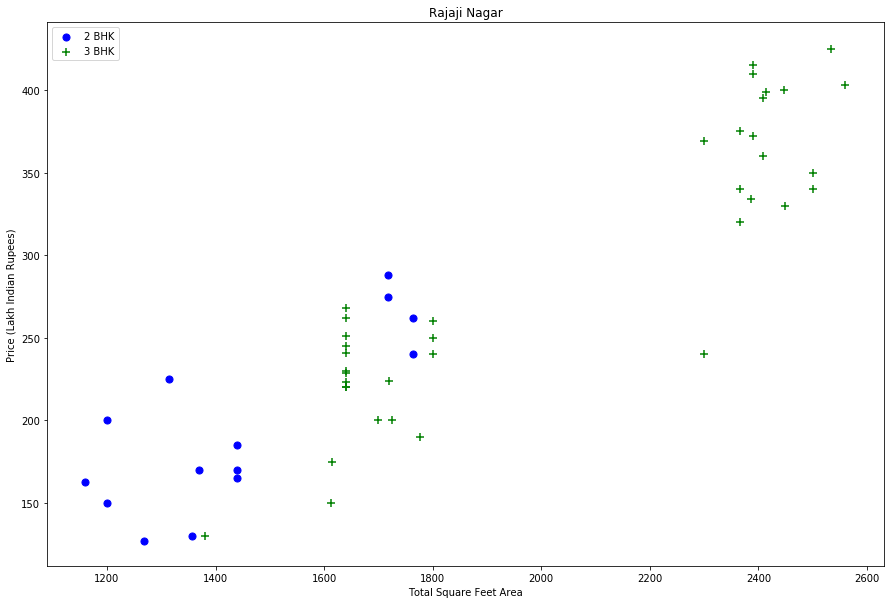

In [380]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

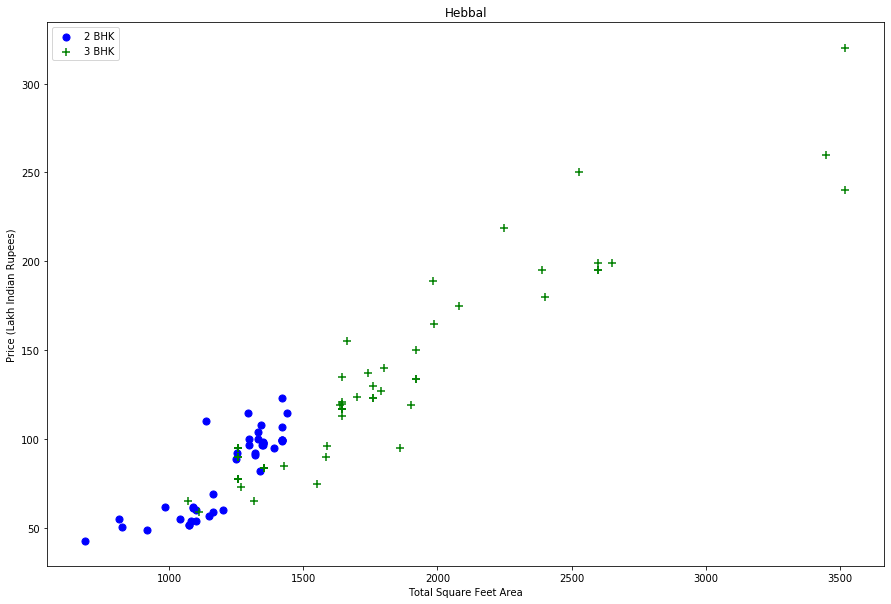

In [381]:
plot_scatter_chart(df3,"Hebbal")

In [382]:
for location, location_df in df3.groupby('location'):
    for bhk, bhk_df in location_df.groupby('BHK'):
        print(bhk,bhk_df)

2               location  total_sqft  bath  price  BHK  price_per_square_foot
4  1st Block Jayanagar      1235.0   2.0  148.0    2           11983.805668
3               location  total_sqft  bath  price  BHK  price_per_square_foot
1  1st Block Jayanagar      1630.0   3.0  194.0    3           11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3           12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3           10833.333333
4               location  total_sqft  bath  price  BHK  price_per_square_foot
0  1st Block Jayanagar      2850.0   4.0  428.0    4           15017.543860
5  1st Block Jayanagar      2750.0   4.0  413.0    4           15018.181818
6  1st Block Jayanagar      2450.0   4.0  368.0    4           15020.408163
1               location  total_sqft  bath  price  BHK  price_per_square_foot
16  1st Phase JP Nagar       840.0   2.0   50.0    1            5952.380952
2               location  total_sqft  bath  price  BHK  price_per_square_foot
13

2                location  total_sqft  bath  price  BHK  price_per_square_foot
238  9th Phase JP Nagar     1005.00   2.0  50.00    2            4975.124378
240  9th Phase JP Nagar     1100.00   2.0  65.00    2            5909.090909
241  9th Phase JP Nagar     1080.00   2.0  37.00    2            3425.925926
242  9th Phase JP Nagar     1035.00   2.0  45.00    2            4347.826087
244  9th Phase JP Nagar     1164.00   2.0  56.00    2            4810.996564
245  9th Phase JP Nagar     1005.00   2.0  42.00    2            4179.104478
246  9th Phase JP Nagar     1127.00   2.0  50.00    2            4436.557232
247  9th Phase JP Nagar     1005.00   2.0  43.00    2            4278.606965
248  9th Phase JP Nagar      835.00   2.0  37.00    2            4431.137725
249  9th Phase JP Nagar     1050.00   2.0  39.00    2            3714.285714
250  9th Phase JP Nagar      660.00   2.0  27.00    2            4090.909091
252  9th Phase JP Nagar     1466.00   2.0  71.00    2            4843.1105

1          location  total_sqft  bath  price  BHK  price_per_square_foot
410  Amruthahalli       485.0   1.0   19.5    1            4020.618557
2          location  total_sqft  bath  price  BHK  price_per_square_foot
391  Amruthahalli       900.0   2.0   40.0    2            4444.444444
392  Amruthahalli      1200.0   2.0   55.0    2            4583.333333
394  Amruthahalli       924.0   2.0   45.0    2            4870.129870
395  Amruthahalli       900.0   2.0   60.0    2            6666.666667
396  Amruthahalli      1100.0   2.0   45.0    2            4090.909091
397  Amruthahalli      1200.0   2.0   55.0    2            4583.333333
402  Amruthahalli      1200.0   2.0   55.0    2            4583.333333
403  Amruthahalli      1250.0   2.0   79.0    2            6320.000000
404  Amruthahalli      1190.0   2.0   50.0    2            4201.680672
405  Amruthahalli      1202.0   2.0   65.0    2            5407.653910
406  Amruthahalli      1340.0   2.0   75.0    2            5597.014925
40

4       location  total_sqft  bath  price  BHK  price_per_square_foot
504  Ardendale      3198.0   4.0  200.0    4            6253.908693
505  Ardendale      2422.0   4.0  160.0    4            6606.110652
507  Ardendale      3200.0   4.0  205.0    4            6406.250000
509  Ardendale      2062.0   3.0  140.0    4            6789.524733
511  Ardendale      2062.0   3.0  150.0    4            7274.490786
512  Ardendale      2800.0   4.0  140.0    4            5000.000000
516  Ardendale      2062.0   3.0  140.0    4            6789.524733
1     location  total_sqft  bath  price  BHK  price_per_square_foot
526  Arekere       600.0   1.0   28.0    1            4666.666667
2     location  total_sqft  bath  price  BHK  price_per_square_foot
523  Arekere       920.0   2.0   40.0    2            4347.826087
525  Arekere      1190.0   2.0   55.0    2            4621.848739
528  Arekere      1100.0   2.0   55.0    2            5000.000000
529  Arekere       900.0   2.0   50.0    2            

1      location  total_sqft  bath   price  BHK  price_per_square_foot
650  Balagere       790.5   1.0  41.900    1            5300.442758
659  Balagere       675.0   1.0  45.000    1            6666.666667
660  Balagere       656.0   1.0  43.000    1            6554.878049
668  Balagere       645.0   1.0  34.180    1            5299.224806
671  Balagere       790.5   1.0  42.295    1            5350.411132
673  Balagere       656.0   1.0  38.770    1            5910.060976
674  Balagere       645.0   1.0  39.000    1            6046.511628
675  Balagere       645.0   1.0  41.000    1            6356.589147
677  Balagere       656.0   1.0  34.770    1            5300.304878
2      location  total_sqft  bath  price  BHK  price_per_square_foot
647  Balagere     1210.00   2.0  80.90    2            6685.950413
648  Balagere     1210.00   2.0  72.00    2            5950.413223
649  Balagere     1205.00   2.0  78.50    2            6514.522822
651  Balagere     1145.00   2.0  65.00    2     

2         location  total_sqft  bath  price  BHK  price_per_square_foot
969  Basavangudi      1036.0   2.0  105.0    2           10135.135135
972  Basavangudi      1560.0   2.0  145.0    2            9294.871795
975  Basavangudi      1100.0   2.0   93.0    2            8454.545455
977  Basavangudi      1050.0   2.0  103.0    2            9809.523810
980  Basavangudi      1180.0   2.0  124.0    2           10508.474576
982  Basavangudi      1200.0   2.0  120.0    2           10000.000000
3         location  total_sqft  bath  price  BHK  price_per_square_foot
967  Basavangudi     1500.00   2.0  143.0    3            9533.333333
968  Basavangudi     1850.00   3.0  168.0    3            9081.081081
971  Basavangudi     1600.00   2.0  160.0    3           10000.000000
973  Basavangudi     1825.00   3.0  175.0    3            9589.041096
974  Basavangudi     1800.00   3.0  195.0    3           10833.333333
976  Basavangudi     1542.14   3.0  120.0    3            7781.394685
978  Basavangudi

3           location  total_sqft  bath  price  BHK  price_per_square_foot
1229  Billekahalli      1935.0   3.0  110.0    3            5684.754522
1231  Billekahalli      1650.0   3.0   88.0    3            5333.333333
1234  Billekahalli      2400.0   3.0  150.0    3            6250.000000
1235  Billekahalli      2968.0   3.0  225.0    3            7580.862534
1240  Billekahalli      1290.0   3.0   62.0    3            4806.201550
1241  Billekahalli      1805.0   3.0  134.0    3            7423.822715
1         location  total_sqft  bath  price  BHK  price_per_square_foot
1243  Binny Pete       665.0   1.0  50.75    1            7631.578947
1245  Binny Pete       660.0   1.0  54.00    1            8181.818182
1246  Binny Pete       660.0   1.0  62.00    1            9393.939394
2         location  total_sqft  bath  price  BHK  price_per_square_foot
1247  Binny Pete      1365.0   2.0  122.0    2            8937.728938
3         location  total_sqft  bath  price  BHK  price_per_square_foo

1       location  total_sqft  bath   price  BHK  price_per_square_foot
1419  Budigere       664.0   1.0  35.000    1            5271.084337
1434  Budigere       664.0   1.0  35.400    1            5331.325301
1439  Budigere       664.0   1.0  34.000    1            5120.481928
1451  Budigere       705.0   1.0  34.545    1            4900.000000
2       location  total_sqft  bath   price  BHK  price_per_square_foot
1409  Budigere      1153.0   2.0  56.400    2            4891.587164
1410  Budigere      1162.0   2.0  59.900    2            5154.905336
1412  Budigere      1153.0   2.0  57.000    2            4943.625325
1413  Budigere      1162.0   2.0  57.000    2            4905.335628
1414  Budigere      1139.0   2.0  62.000    2            5443.371378
1415  Budigere      1139.0   2.0  56.800    2            4986.830553
1416  Budigere      1139.0   2.0  56.850    2            4991.220369
1422  Budigere      1444.0   2.0  70.000    2            4847.645429
1424  Budigere      1139.0   2

2            location  total_sqft  bath  price  BHK  price_per_square_foot
1623  Chikkabanavar       950.0   2.0   40.0    2            4210.526316
1625  Chikkabanavar       600.0   1.0   25.0    2            4166.666667
1629  Chikkabanavar      1067.0   2.0   38.0    2            3561.387067
3            location  total_sqft  bath  price  BHK  price_per_square_foot
1624  Chikkabanavar      1600.0   2.0   80.0    3            5000.000000
1630  Chikkabanavar      1320.0   2.0   46.0    3            3484.848485
4            location  total_sqft  bath  price  BHK  price_per_square_foot
1626  Chikkabanavar      2460.0   7.0   80.0    4             3252.03252
5            location  total_sqft  bath  price  BHK  price_per_square_foot
1627  Chikkabanavar      2400.0   4.0   97.0    5            4041.666667
1628  Chikkabanavar      2000.0   4.0   65.0    5            3250.000000
8            location  total_sqft  bath  price  BHK  price_per_square_foot
1631  Chikkabanavar      4000.0   7.0  11

1756  Devanahalli       658.0   1.0  26.91    1            4089.665653
2          location  total_sqft  bath   price  BHK  price_per_square_foot
1730  Devanahalli      1260.0   2.0  66.780    2            5300.000000
1732  Devanahalli      1360.0   2.0  65.000    2            4779.411765
1733  Devanahalli      1408.0   2.0  85.000    2            6036.931818
1734  Devanahalli      1010.0   2.0  51.000    2            5049.504950
1735  Devanahalli      1080.0   2.0  53.350    2            4939.814815
1737  Devanahalli      1080.0   2.0  44.000    2            4074.074074
1739  Devanahalli      1174.0   2.0  59.000    2            5025.553663
1743  Devanahalli      1080.0   2.0  52.000    2            4814.814815
1749  Devanahalli      1045.0   2.0  48.000    2            4593.301435
1752  Devanahalli      1340.0   2.0  65.000    2            4850.746269
1754  Devanahalli      1230.0   2.0  56.450    2            4589.430894
1755  Devanahalli      1360.0   2.0  62.425    2            459

3          location  total_sqft  bath  price  BHK  price_per_square_foot
1865  Dommasandra      1033.0   2.0  25.53    3            2471.442401
1866  Dommasandra      1267.0   3.0  56.00    3            4419.889503
1869  Dommasandra      1033.0   2.0  31.50    3            3049.370765
4          location  total_sqft  bath  price  BHK  price_per_square_foot
1868  Dommasandra      2700.0   3.0   68.0    4            2518.518519
2        location  total_sqft  bath  price  BHK  price_per_square_foot
1877  EPIP Zone      1285.0   2.0  82.00    2            6381.322957
1879  EPIP Zone      1330.0   2.0  92.50    2            6954.887218
1880  EPIP Zone      1330.0   2.0  86.98    2            6539.849624
1881  EPIP Zone      1330.0   2.0  93.36    2            7019.548872
1884  EPIP Zone      1280.0   2.0  69.00    2            5390.625000
1885  EPIP Zone      1125.0   2.0  65.00    2            5777.777778
1888  EPIP Zone      1343.0   2.0  86.00    2            6403.574088
3        locatio

3        location  total_sqft  bath  price  BHK  price_per_square_foot
2380  GM Palaya      1820.0   2.0   86.0    3            4725.274725
2383  GM Palaya      1315.0   2.0   65.0    3            4942.965779
2384  GM Palaya      1315.0   3.0   65.0    3            4942.965779
2385  GM Palaya      1315.0   3.0   64.0    3            4866.920152
2386  GM Palaya      1735.0   3.0   70.0    3            4034.582133
2387  GM Palaya      1643.0   2.0   70.0    3            4260.499087
2               location  total_sqft  bath  price  BHK  price_per_square_foot
2389  Garudachar Palya      1060.0   2.0  48.70    2            4594.339623
2390  Garudachar Palya      1150.0   2.0  52.75    2            4586.956522
2394  Garudachar Palya      1150.0   2.0  52.80    2            4591.304348
2395  Garudachar Palya      1150.0   2.0  52.80    2            4591.304348
2396  Garudachar Palya      1060.0   2.0  48.50    2            4575.471698
2397  Garudachar Palya      1150.0   2.0  52.50    2     

2523  HAL 2nd Stage      2700.0   3.0  500.0    3           18518.518519
5            location  total_sqft  bath  price  BHK  price_per_square_foot
2524  HAL 2nd Stage      2040.0   4.0  500.0    5           24509.803922
2         location  total_sqft  bath  price  BHK  price_per_square_foot
2528  HBR Layout      1200.0   2.0   60.0    2            5000.000000
2529  HBR Layout      1004.0   2.0   49.0    2            4880.478088
2532  HBR Layout      1089.0   2.0   60.0    2            5509.641873
2534  HBR Layout      1198.0   2.0   65.0    2            5425.709516
2536  HBR Layout      1200.0   2.0  120.0    2           10000.000000
3         location  total_sqft  bath  price  BHK  price_per_square_foot
2525  HBR Layout      2800.0   2.0  200.0    3            7142.857143
2526  HBR Layout      1722.0   3.0   95.0    3            5516.840883
2530  HBR Layout      1783.0   3.0  125.0    3            7010.656197
2531  HBR Layout      1656.0   3.0   90.0    3            5434.782609
2533 

4      location  total_sqft  bath  price  BHK  price_per_square_foot
2794   Hebbal      5611.5   4.0  477.0    4            8500.400962
2797   Hebbal      2483.0   5.0  212.0    4            8538.058800
2807   Hebbal      2790.0   5.0  198.0    4            7096.774194
2809   Hebbal      2483.0   5.0  215.0    4            8658.880387
2812   Hebbal      2790.0   4.0  198.0    4            7096.774194
2814   Hebbal      3067.0   4.0  230.0    4            7499.184871
2816   Hebbal      3067.0   4.0  230.0    4            7499.184871
2822   Hebbal      4235.0   4.0  365.0    4            8618.654073
2824   Hebbal      3960.0   5.0  386.0    4            9747.474747
2839   Hebbal      2483.0   5.0  230.0    4            9262.988321
2845   Hebbal      2790.0   4.0  198.0    4            7096.774194
2846   Hebbal      3960.0   5.0  386.0    4            9747.474747
2854   Hebbal      2790.0   4.0  198.0    4            7096.774194
2864   Hebbal      2790.0   5.0  204.0    4            7311.

5      location  total_sqft  bath  price  BHK  price_per_square_foot
2999   Hennur      2500.0   5.0  125.0    5                 5000.0
2          location  total_sqft  bath   price  BHK  price_per_square_foot
3029  Hennur Road      1385.0   2.0   83.09    2            5999.277978
3030  Hennur Road      1317.5   2.0   63.77    2            4840.227704
3033  Hennur Road      1157.0   2.0   84.00    2            7260.155575
3040  Hennur Road      1232.0   2.0   89.00    2            7224.025974
3041  Hennur Road      1065.0   2.0   42.60    2            4000.000000
3046  Hennur Road      1232.0   2.0   69.61    2            5650.162338
3047  Hennur Road       987.0   2.0   49.00    2            4964.539007
3052  Hennur Road      1065.0   2.0   42.60    2            4000.000000
3053  Hennur Road      1385.0   2.0   83.09    2            5999.277978
3059  Hennur Road       901.0   2.0   49.50    2            5493.895671
3062  Hennur Road      1182.0   2.0   82.50    2            6979.69543

5             location  total_sqft  bath  price  BHK  price_per_square_foot
3224  Horamavu Agara      2400.0   3.0   80.0    5            3333.333333
2                 location  total_sqft  bath  price  BHK  price_per_square_foot
3241  Horamavu Banaswadi      1460.0   2.0   80.5    2            5513.698630
3242  Horamavu Banaswadi      1156.0   2.0   46.0    2            3979.238754
3243  Horamavu Banaswadi      1180.0   2.0   58.0    2            4915.254237
3244  Horamavu Banaswadi      1307.0   2.0   51.6    2            3947.972456
3246  Horamavu Banaswadi      1357.0   2.0   54.0    2            3979.366249
3247  Horamavu Banaswadi       925.0   2.0   38.0    2            4108.108108
3248  Horamavu Banaswadi      1272.0   2.0   48.0    2            3773.584906
3249  Horamavu Banaswadi      1225.0   2.0   49.5    2            4040.816327
3250  Horamavu Banaswadi      1272.0   2.0   51.5    2            4048.742138
3251  Horamavu Banaswadi      1272.0   2.0   51.5    2            40

3            location  total_sqft  bath  price  BHK  price_per_square_foot
3355  Hosakerehalli      2378.0   3.0  262.0    3           11017.661901
3356  Hosakerehalli      2376.0   3.0  203.0    3            8543.771044
3361  Hosakerehalli      1817.0   4.0  153.0    3            8420.473308
3363  Hosakerehalli      2480.0   3.0  245.0    3            9879.032258
3365  Hosakerehalli      2480.0   4.0  260.0    3           10483.870968
3366  Hosakerehalli      1596.0   3.0   79.8    3            5000.000000
3367  Hosakerehalli      1200.0   2.0  100.0    3            8333.333333
3371  Hosakerehalli      2480.0   4.0  265.0    3           10685.483871
3373  Hosakerehalli      2376.0   3.0  240.0    3           10101.010101
4            location  total_sqft  bath  price  BHK  price_per_square_foot
3357  Hosakerehalli      3205.0   5.0  380.0    4           11856.474259
3358  Hosakerehalli      3024.0   5.0  248.0    4            8201.058201
3359  Hosakerehalli      3024.0   5.0  350.0   

1           location  total_sqft  bath  price  BHK  price_per_square_foot
3509  Indira Nagar       500.0   1.0   70.0    1           14000.000000
3516  Indira Nagar       850.0   1.0   57.0    1            6705.882353
3528  Indira Nagar       850.0   1.0   60.0    1            7058.823529
2           location  total_sqft  bath  price  BHK  price_per_square_foot
3501  Indira Nagar      1200.0   2.0   93.0    2            7750.000000
3502  Indira Nagar      1128.0   2.0  105.0    2            9308.510638
3506  Indira Nagar      1210.0   2.0  102.0    2            8429.752066
3507  Indira Nagar      1224.0   2.0  105.0    2            8578.431373
3510  Indira Nagar      1400.0   2.0  168.0    2           12000.000000
3513  Indira Nagar      1145.0   2.0  100.0    2            8733.624454
3514  Indira Nagar      1470.0   2.0  170.0    2           11564.625850
3519  Indira Nagar      1260.0   2.0  100.0    2            7936.507937
3525  Indira Nagar      1475.0   2.0  171.0    2           1

1       location  total_sqft  bath  price  BHK  price_per_square_foot
3743  KR Puram       714.0   1.0   28.0    1            3921.568627
3791  KR Puram       700.0   1.0   21.5    1            3071.428571
2       location  total_sqft  bath  price  BHK  price_per_square_foot
3732  KR Puram     1277.50   2.0  56.80    2            4446.183953
3733  KR Puram      930.00   2.0  39.00    2            4193.548387
3734  KR Puram     1155.00   2.0  42.74    2            3700.432900
3735  KR Puram     1225.00   2.0  46.55    2            3800.000000
3736  KR Puram     1100.00   2.0  47.00    2            4272.727273
3737  KR Puram     1200.00   2.0  71.00    2            5916.666667
3739  KR Puram      750.00   2.0  25.00    2            3333.333333
3741  KR Puram     1015.00   2.0  43.00    2            4236.453202
3742  KR Puram     1470.00   2.0  86.00    2            5850.340136
3744  KR Puram     1142.00   2.0  51.00    2            4465.849387
3745  KR Puram     1115.00   2.0  33.45    2

2          location  total_sqft  bath  price  BHK  price_per_square_foot
3895  Kaggalipura       950.0   2.0   48.0    2            5052.631579
3896  Kaggalipura      1000.0   2.0   60.0    2            6000.000000
3897  Kaggalipura       950.0   2.0   50.0    2            5263.157895
3898  Kaggalipura       950.0   2.0   47.0    2            4947.368421
3903  Kaggalipura       950.0   2.0   45.0    2            4736.842105
3904  Kaggalipura       950.0   2.0   60.0    2            6315.789474
3          location  total_sqft  bath  price  BHK  price_per_square_foot
3891  Kaggalipura      1150.0   2.0   55.0    3            4782.608696
3893  Kaggalipura      1210.0   2.0   58.0    3            4793.388430
3899  Kaggalipura      1150.0   2.0   62.0    3            5391.304348
3901  Kaggalipura      1150.0   2.0   57.5    3            5000.000000
3902  Kaggalipura      1210.0   2.0   65.0    3            5371.900826
2             location  total_sqft  bath  price  BHK  price_per_square_fo

1             location  total_sqft  bath   price  BHK  price_per_square_foot
4037  Kanakpura Road       525.0   1.0  26.000    1            4952.380952
4041  Kanakpura Road       525.0   1.0  27.250    1            5190.476190
4043  Kanakpura Road       525.0   1.0  30.000    1            5714.285714
4047  Kanakpura Road       525.0   1.0  26.000    1            4952.380952
4069  Kanakpura Road       825.0   1.0  36.290    1            4398.787879
4080  Kanakpura Road       525.0   1.0  25.000    1            4761.904762
4088  Kanakpura Road       525.0   1.0  30.000    1            5714.285714
4091  Kanakpura Road       525.0   1.0  30.000    1            5714.285714
4098  Kanakpura Road       458.0   1.0  19.695    1            4300.218341
4116  Kanakpura Road       670.0   1.0  35.000    1            5223.880597
4123  Kanakpura Road       525.0   1.0  30.000    1            5714.285714
4129  Kanakpura Road       712.0   1.0  38.440    1            5398.876404
4138  Kanakpura Road   

3          location  total_sqft  bath  price  BHK  price_per_square_foot
4323  Kathriguppe      1400.0   2.0  77.00    3            5500.000000
4324  Kathriguppe      1250.0   2.0  68.75    3            5500.000000
4325  Kathriguppe      1245.0   2.0  68.48    3            5500.401606
4326  Kathriguppe      1350.0   2.0  87.01    3            6445.185185
4327  Kathriguppe      1350.0   2.0  80.99    3            5999.259259
4328  Kathriguppe      1365.0   2.0  75.08    3            5500.366300
4329  Kathriguppe      1300.0   3.0  77.99    3            5999.230769
4330  Kathriguppe      1350.0   2.0  80.99    3            5999.259259
4331  Kathriguppe      1390.0   2.0  76.45    3            5500.000000
4332  Kathriguppe      1350.0   3.0  78.30    3            5800.000000
4333  Kathriguppe      1250.0   2.0  68.75    3            5500.000000
4334  Kathriguppe      1300.0   3.0  77.99    3            5999.230769
4335  Kathriguppe      1335.0   2.0  73.43    3            5500.374532
4336

2          location  total_sqft  bath  price  BHK  price_per_square_foot
4529  Konanakunte       884.0   1.0   58.0    2            6561.085973
3          location  total_sqft  bath  price  BHK  price_per_square_foot
4528  Konanakunte      2791.0   3.0  223.0    3            7989.967753
4532  Konanakunte      2400.0   2.0  180.0    3            7500.000000
4534  Konanakunte      1423.0   2.0   85.0    3            5973.295854
4          location  total_sqft  bath  price  BHK  price_per_square_foot
4530  Konanakunte      1200.0   4.0  125.0    4           10416.666667
4531  Konanakunte      1200.0   2.0  130.0    4           10833.333333
4533  Konanakunte      3746.0   6.0  375.0    4           10010.678057
2          location  total_sqft  bath  price  BHK  price_per_square_foot
4535  Koramangala      1320.0   2.0  165.0    2           12500.000000
4536  Koramangala      1253.0   2.0  102.0    2            8140.462889
4540  Koramangala      1005.0   1.0  110.0    2           10945.27363

1      location  total_sqft  bath  price  BHK  price_per_square_foot
4786  Laggere      1200.0   1.0  125.0    1           10416.666667
4788  Laggere       620.0   2.0   48.0    1            7741.935484
2      location  total_sqft  bath  price  BHK  price_per_square_foot
4787  Laggere      1200.0   2.0   75.0    2                 6250.0
3      location  total_sqft  bath  price  BHK  price_per_square_foot
4785  Laggere      1200.0   3.0  130.0    3           10833.333333
5      location  total_sqft  bath  price  BHK  price_per_square_foot
4784  Laggere      2800.0   5.0  125.0    5            4464.285714
2                   location  total_sqft  bath  price  BHK  \
4789  Lakshminarayana Pura      1185.0   2.0   75.0    2   
4791  Lakshminarayana Pura      1180.0   2.0   75.0    2   
4792  Lakshminarayana Pura      1172.0   2.0   82.0    2   
4793  Lakshminarayana Pura      1179.0   2.0   75.0    2   
4794  Lakshminarayana Pura      1149.0   2.0   75.0    2   
4795  Lakshminarayana Pura 

2              location  total_sqft  bath  price  BHK  price_per_square_foot
5093  Margondanahalli      1090.0   2.0  58.00    2            5321.100917
5094  Margondanahalli      1200.0   2.0  58.50    2            4875.000000
5095  Margondanahalli      1200.0   2.0  67.00    2            5583.333333
5097  Margondanahalli      1000.0   2.0  57.00    2            5700.000000
5099  Margondanahalli       600.0   2.0  35.00    2            5833.333333
5100  Margondanahalli      1200.0   2.0  69.00    2            5750.000000
5101  Margondanahalli       900.0   2.0  49.00    2            5444.444444
5102  Margondanahalli      1140.0   2.0  60.00    2            5263.157895
5103  Margondanahalli      1100.0   2.0  55.00    2            5000.000000
5104  Margondanahalli      1152.0   1.0  66.00    2            5729.166667
5106  Margondanahalli      1200.0   2.0  65.00    2            5416.666667
5107  Margondanahalli      1050.0   2.0  58.00    2            5523.809524
5108  Margondanahalli  

4       location  total_sqft  bath  price  BHK  price_per_square_foot
5242  Nagavara     2172.65   3.0  120.0    4            5523.208984
5250  Nagavara     2496.00   4.0  125.0    4            5008.012821
1            location  total_sqft  bath  price  BHK  price_per_square_foot
5254  Nagavarapalya       705.0   1.0   52.5    1            7446.808511
5256  Nagavarapalya       705.0   1.0   57.0    1            8085.106383
5257  Nagavarapalya       705.0   1.0   55.0    1            7801.418440
5258  Nagavarapalya       705.0   1.0   57.0    1            8085.106383
2            location  total_sqft  bath  price  BHK  price_per_square_foot
5253  Nagavarapalya      1392.0   2.0   99.0    2            7112.068966
5259  Nagavarapalya      1335.0   2.0  110.0    2            8239.700375
5260  Nagavarapalya      1260.0   2.0   85.5    2            6785.714286
3            location  total_sqft  bath  price  BHK  price_per_square_foot
5255  Nagavarapalya      1300.0   3.0   80.0    3         

1                 location  total_sqft  bath  price  BHK  price_per_square_foot
5455  Parappana Agrahara      1200.0   1.0   45.0    1                 3750.0
2                 location  total_sqft  bath  price  BHK  price_per_square_foot
5446  Parappana Agrahara      1194.0   2.0   47.0    2            3936.348409
5447  Parappana Agrahara      1194.0   2.0   47.0    2            3936.348409
5448  Parappana Agrahara      1194.0   2.0   46.0    2            3852.596315
5449  Parappana Agrahara      1194.0   2.0   47.0    2            3936.348409
5450  Parappana Agrahara      1194.0   2.0   46.0    2            3852.596315
5451  Parappana Agrahara      1194.0   2.0   47.0    2            3936.348409
5452  Parappana Agrahara      1194.0   2.0   47.0    2            3936.348409
5453  Parappana Agrahara      1092.0   2.0   43.0    2            3937.728938
5454  Parappana Agrahara      1194.0   2.0   45.0    2            3768.844221
5456  Parappana Agrahara      1194.0   2.0   46.0    2      

5660            6666.666667  
1           location  total_sqft  bath  price  BHK  price_per_square_foot
5745  Rajaji Nagar       660.0   1.0   75.0    1           11363.636364
2           location  total_sqft  bath  price  BHK  price_per_square_foot
5737  Rajaji Nagar      1370.0   2.0  170.0    2           12408.759124
5740  Rajaji Nagar      1718.0   3.0  288.0    2           16763.678696
5743  Rajaji Nagar      1200.0   2.0  150.0    2           12500.000000
5744  Rajaji Nagar      1160.0   1.0  163.0    2           14051.724138
5746  Rajaji Nagar      1440.0   2.0  170.0    2           11805.555556
5748  Rajaji Nagar      1440.0   2.0  185.0    2           12847.222222
5755  Rajaji Nagar      1357.0   2.0  130.0    2            9579.955785
5762  Rajaji Nagar      1763.0   3.0  262.0    2           14861.032331
5769  Rajaji Nagar      1268.0   2.0  127.0    2           10015.772871
5772  Rajaji Nagar      1200.0   1.0  200.0    2           16666.666667
5788  Rajaji Nagar      1718.0

4               location  total_sqft  bath  price  BHK  price_per_square_foot
5853  Ramamurthy Nagar      3700.0   4.0  225.0    4            6081.081081
5891  Ramamurthy Nagar      2200.0   4.0  130.0    4            5909.090909
5893  Ramamurthy Nagar      2916.0   5.0  230.0    4            7887.517147
5               location  total_sqft  bath  price  BHK  price_per_square_foot
5854  Ramamurthy Nagar      3500.0   5.0  150.0    5            4285.714286
1         location  total_sqft  bath  price  BHK  price_per_square_foot
5909  Rayasandra       583.0   1.0   26.9    1            4614.065180
5916  Rayasandra       470.0   1.0   21.0    1            4468.085106
2         location  total_sqft  bath  price  BHK  price_per_square_foot
5904  Rayasandra      1065.0   2.0  44.95    2            4220.657277
5908  Rayasandra      1253.0   2.0  57.00    2            4549.082203
5910  Rayasandra      1198.0   2.0  54.00    2            4507.512521
3         location  total_sqft  bath  price  B

3             location  total_sqft  bath   price  BHK  price_per_square_foot
6042  Sarjapur  Road      2497.0   3.0  140.00    3            5606.728074
6043  Sarjapur  Road      1787.0   3.0   98.29    3            5500.279799
6044  Sarjapur  Road      1787.0   3.0  125.00    3            6994.963626
6051  Sarjapur  Road      1550.0   3.0  100.00    3            6451.612903
6052  Sarjapur  Road      2100.0   3.0  125.00    3            5952.380952
...              ...         ...   ...     ...  ...                    ...
6325  Sarjapur  Road      1565.0   3.0   78.00    3            4984.025559
6327  Sarjapur  Road      1984.0   4.0  148.00    3            7459.677419
6333  Sarjapur  Road      3500.0   3.0  275.00    3            7857.142857
6334  Sarjapur  Road      1850.0   3.0   89.00    3            4810.810811
6336  Sarjapur  Road      1380.0   2.0   55.00    3            3985.507246

[145 rows x 6 columns]
4             location  total_sqft  bath  price  BHK  price_per_square_foo

4                location  total_sqft  bath  price  BHK  price_per_square_foot
6435  Somasundara Palya      2400.0   3.0  140.0    4            5833.333333
2      location  total_sqft  bath  price  BHK  price_per_square_foot
6439  Sompura       825.0   2.0   33.0    2            4000.000000
6441  Sompura      1020.0   2.0   41.0    2            4019.607843
6442  Sompura      1126.0   2.0   39.0    2            3463.587922
6443  Sompura       825.0   2.0   32.0    2            3878.787879
3      location  total_sqft  bath  price  BHK  price_per_square_foot
6440  Sompura      1025.0   2.0   37.0    3            3609.756098
6444  Sompura      1360.0   2.0   45.0    3            3308.823529
6445  Sompura      1350.0   2.0   47.0    3            3481.481481
4      location  total_sqft  bath  price  BHK  price_per_square_foot
6446  Sompura      2150.0   3.0   85.0    4            3953.488372
1           location  total_sqft  bath   price  BHK  price_per_square_foot
6452  Sonnenahalli       6

2             location  total_sqft  bath  price  BHK  price_per_square_foot
6723  Thigalarapalya      1297.0   2.0  103.0    2            7941.403238
6724  Thigalarapalya      1418.0   2.0   95.0    2            6699.576869
6728  Thigalarapalya      1418.0   2.0  103.0    2            7263.751763
6729  Thigalarapalya      1418.0   2.0  101.0    2            7122.708039
6730  Thigalarapalya      1418.0   2.0  104.0    2            7334.273625
6734  Thigalarapalya      1418.0   2.0  103.0    2            7263.751763
6737  Thigalarapalya      1418.0   2.0  106.0    2            7475.317348
6739  Thigalarapalya      1418.0   2.0  104.0    2            7334.273625
6741  Thigalarapalya      1418.0   2.0  105.0    2            7404.795487
6742  Thigalarapalya      1418.0   2.0  104.0    2            7334.273625
6745  Thigalarapalya      1418.0   2.0  106.0    2            7475.317348
6748  Thigalarapalya      1418.0   2.0  105.0    2            7404.795487
6759  Thigalarapalya      1418.0   2

3          location  total_sqft  bath  price  BHK  price_per_square_foot
6835  Uttarahalli      1440.0   2.0  62.00    3            4305.555556
6841  Uttarahalli      1135.0   2.0  39.73    3            3500.440529
6842  Uttarahalli      1540.0   3.0  50.00    3            3246.753247
6844  Uttarahalli      1390.0   2.0  62.55    3            4500.000000
6845  Uttarahalli      1330.0   2.0  56.00    3            4210.526316
...           ...         ...   ...    ...  ...                    ...
6995  Uttarahalli      1290.0   2.0  56.12    3            4350.387597
6996  Uttarahalli      1328.0   2.0  56.00    3            4216.867470
6998  Uttarahalli      1290.0   2.0  56.12    3            4350.387597
6999  Uttarahalli      1590.0   3.0  57.00    3            3584.905660
7001  Uttarahalli      1345.0   2.0  57.00    3            4237.918216

[89 rows x 6 columns]
4          location  total_sqft  bath  price  BHK  price_per_square_foot
6974  Uttarahalli      4500.0   4.0  150.0    4   

3             location  total_sqft  bath  price  BHK  price_per_square_foot
7647  Yelachenahalli      1400.0   2.0   55.0    3            3928.571429
7648  Yelachenahalli      1464.0   2.0  105.0    3            7172.131148
7650  Yelachenahalli      1700.0   3.0  130.0    3            7647.058824
7653  Yelachenahalli      1330.0   3.0   73.5    3            5526.315789
7656  Yelachenahalli      1365.0   2.0   72.0    3            5274.725275
1        location  total_sqft  bath   price  BHK  price_per_square_foot
7672  Yelahanka       697.0   1.0  45.000    1            6456.241033
7678  Yelahanka       628.0   1.0  24.000    1            3821.656051
7681  Yelahanka       654.0   1.0  38.400    1            5871.559633
7715  Yelahanka       654.0   1.0  37.000    1            5657.492355
7730  Yelahanka       602.0   1.0  26.000    1            4318.936877
7761  Yelahanka       654.0   1.0  36.250    1            5542.813456
7763  Yelahanka       694.0   1.0  30.840    1            4443

5       location  total_sqft  bath  price  BHK  price_per_square_foot
8130     other      4200.0   5.0  225.0    5            5357.142857
8132     other      1600.0   4.0  125.0    5            7812.500000
8157     other      1560.0   5.0  145.0    5            9294.871795
8158     other      2900.0   5.0   90.0    5            3103.448276
8240     other      1800.0   6.0   44.5    5            2472.222222
8243     other      2400.0   4.0  300.0    5           12500.000000
8332     other      2800.0   4.0  200.0    5            7142.857143
8360     other      1575.0   4.0  150.0    5            9523.809524
8366     other      6040.0   4.0  170.0    5            2814.569536
8449     other      1600.0   5.0  140.0    5            8750.000000
8475     other      2000.0   4.0  103.0    5            5150.000000
8477     other      2400.0   5.0  235.0    5            9791.666667
8540     other      6200.0   5.0  720.0    5           11612.903226
8613     other      2400.0   5.0  120.0    5  

In [383]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_square_foot),
                'std': np.std(bhk_df.price_per_square_foot),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_square_foot<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [384]:
df4 = remove_bhk_outliers(df3)
df4.shape

(7329, 6)

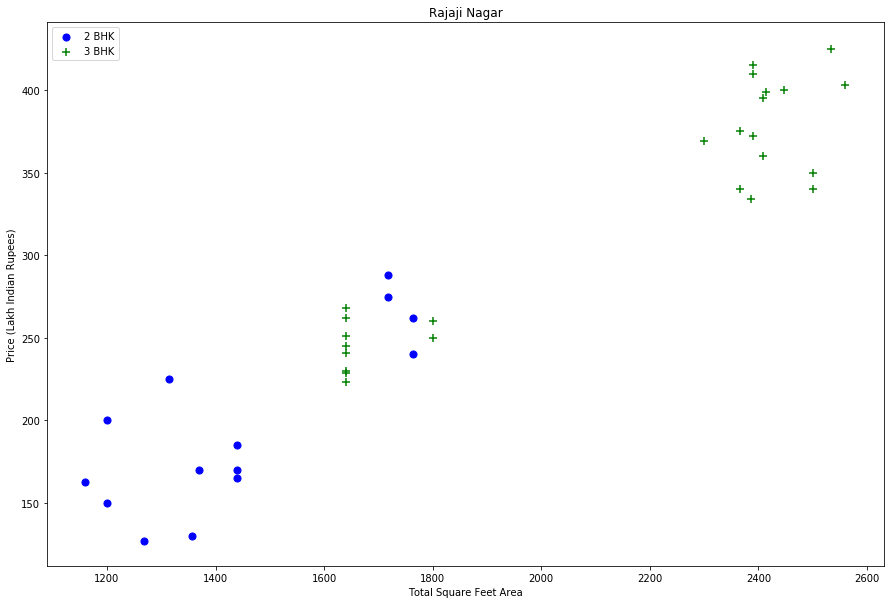

In [385]:
plot_scatter_chart(df4,"Rajaji Nagar")

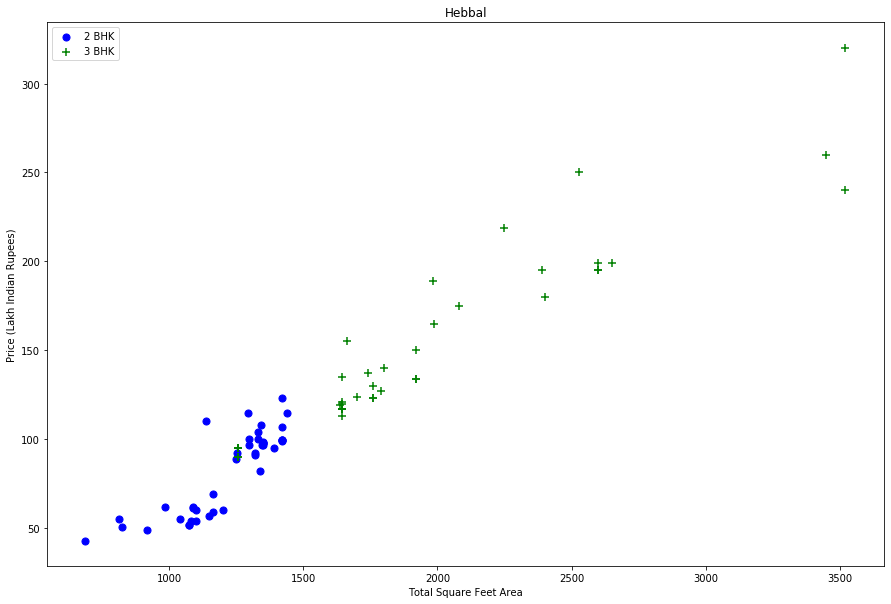

In [386]:
plot_scatter_chart(df4,"Hebbal")

Text(0, 0.5, 'Count')

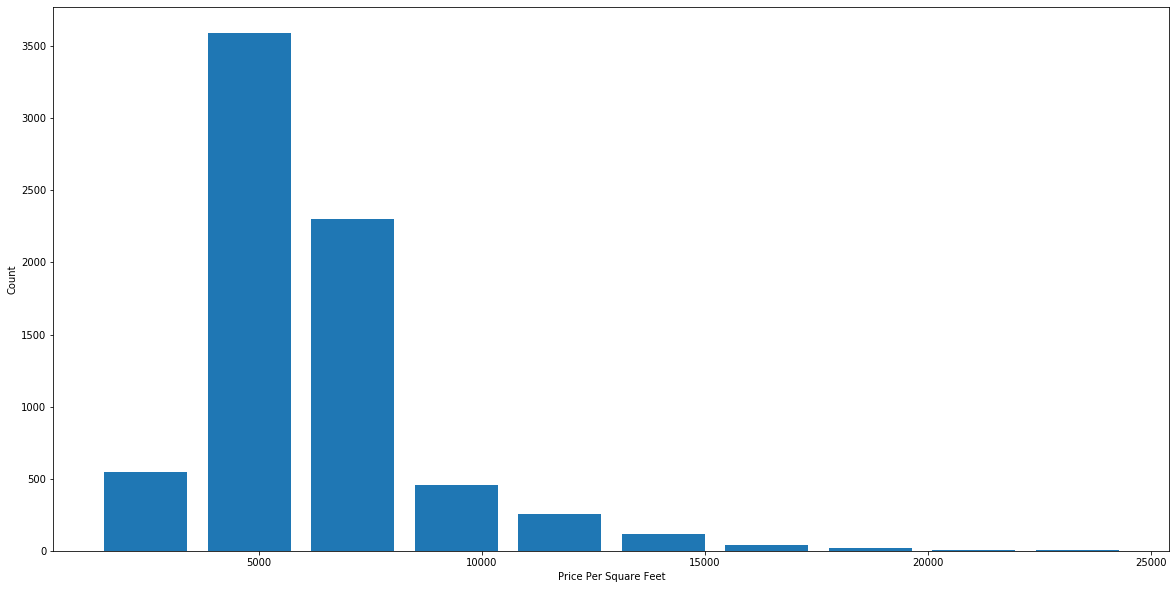

In [387]:
#count of property per square feet
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_square_foot,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [388]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

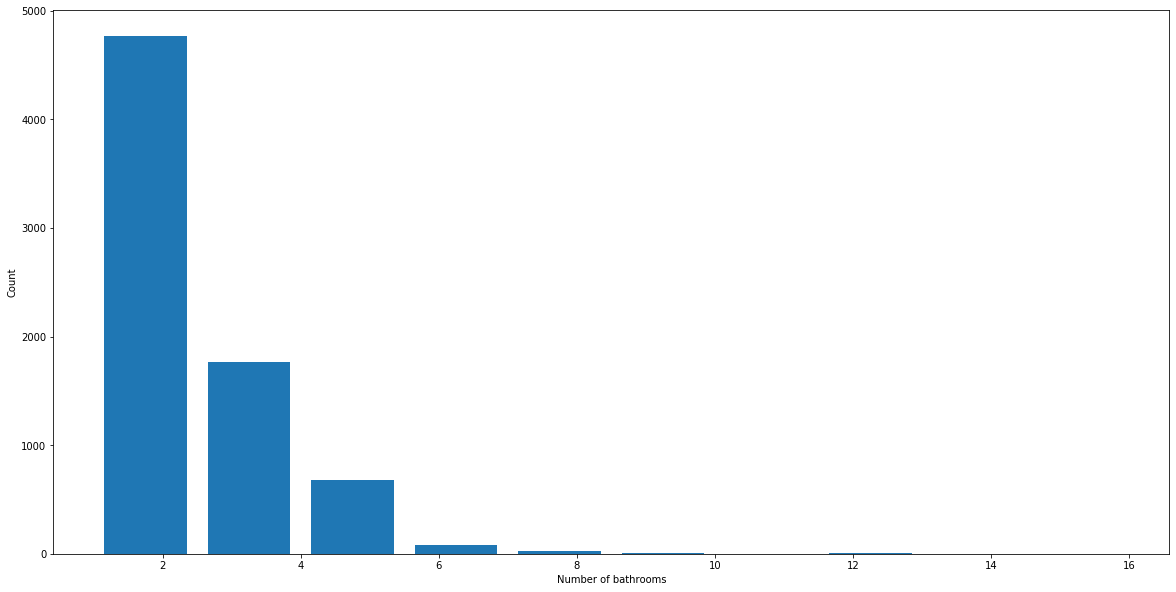

In [389]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [390]:
df4[df4.bath>10]

,location,total_sqft,bath,price,BHK,price_per_square_foot
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [391]:
df4[df4.bath>df4.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_square_foot
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [392]:
df5 = df4[df4.bath<df4.BHK+2]
df5.shape

(7251, 6)

In [393]:
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
df6= pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head()

,location,total_sqft,bath,price,BHK,price_per_square_foot,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [395]:
df7= df6.drop('location',axis='columns')
df7.head()

,total_sqft,bath,price,BHK,price_per_square_foot,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [396]:
df7.drop('price_per_square_foot',axis='columns',inplace=True)
df7.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
X= df7.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [398]:
y= df7['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [399]:
X.shape

(7251, 244)

In [400]:
y.shape

(7251,)

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [402]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874312

In [403]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [404]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687660,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.726487,"{'criterion': 'mse', 'splitter': 'best'}"


In [405]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [406]:
#to know location index of any location
np.where(X.columns=='5th Block Hbr Layout')[0][0]

7

In [407]:
def predict_price(location,total_sqft,bath,BHK):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [408]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

58.67875807236727

In [409]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

63.75778301687802

In [410]:
predict_price('Indira Nagar',1000, 3, 3)

161.53689108515437

In [411]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

#Export location and column information to a file that will be useful later on in our prediction application 

In [412]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))